# 📝  Analyzing Diatoms with scikit-image: A Classical Engineering Spin


## 🌊 Introduction to Diatoms

Diatoms are microscopic algae with intricate, silica-based cell walls that look like tiny works of art under a microscope. These organisms play an essential role in aquatic ecosystems and have unique applications in engineering, including:

- Bio-inspired Materials: Designing filters or photonic crystals.
- Environmental Monitoring: Studying water quality through diatom abundance.
- Oxygen Production: Understanding their contribution to the global carbon cycle as they contribute between 20-50\% of Oxygen production.

The Academy of Natural Sciences at Drexel Universities Diatom Herbarium is one of the world's largest, housing approximately 220,000 slides, including 5,000 type specimens from fresh, brackish, and marine habitats. It features extensive collections from freshwater environmental surveys across the U.S., conducted over decades by the former Department of Limnology and the Phycology Section. This unique resource provides invaluable insights into long-term changes in diatom populations and ecology.

Let’s dive into how scikit-image can help process and analyze images of diatoms for environmental and material science applications.


## 📸 Step 1: Loading an Image of Diatoms

We begin by loading a diatom microscopy image to analyze its structure.


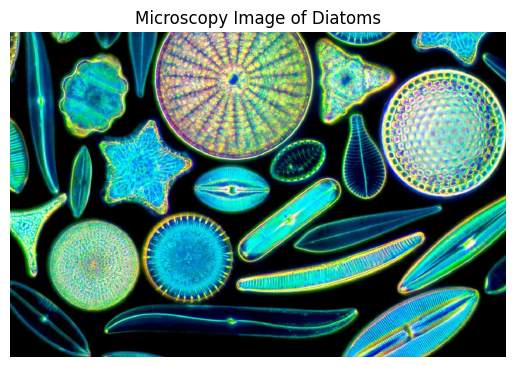

In [1]:
import skimage as ski
import matplotlib.pyplot as plt

# Load an example diatom image
diatom_image = ski.io.imread("./assets/figures/diatoms.webp")

# Display the image
plt.imshow(diatom_image, cmap="gray")
plt.axis("off")
plt.title("Microscopy Image of Diatoms")
plt.show()

## 📏 Step 2: Exploring Image Properties

Understanding the dimensions, intensity ranges, and type of the image is crucial.


In [2]:
# Shape of the image (Height x Width x Channels for RGB images)
print(f"Image Shape: {diatom_image.shape}")

# Total number of pixels
print(f"Total Pixels: {diatom_image.size}")

# Intensity range
print(f"Intensity Range: Min={diatom_image.min()}, Max={diatom_image.max()}")

# Average brightness
print(f"Mean Intensity: {diatom_image.mean()}")

Image Shape: (985, 1504, 3)
Total Pixels: 4444320
Intensity Range: Min=0, Max=255
Mean Intensity: 85.6534527216762


### Explanation:

- Shape: Reveals whether the image is grayscale or RGB.
- Intensity Range: Highlights brightness levels for thresholding or segmentation.
- Mean Intensity: Indicates the average light intensity in the image.


## 🔍 Step 3: Image Segmentation

Segment the diatoms from the background using advanced methods.


### Problem:

The diatoms are bright structures on a darker background, making Otsu's Thresholding a suitable method.


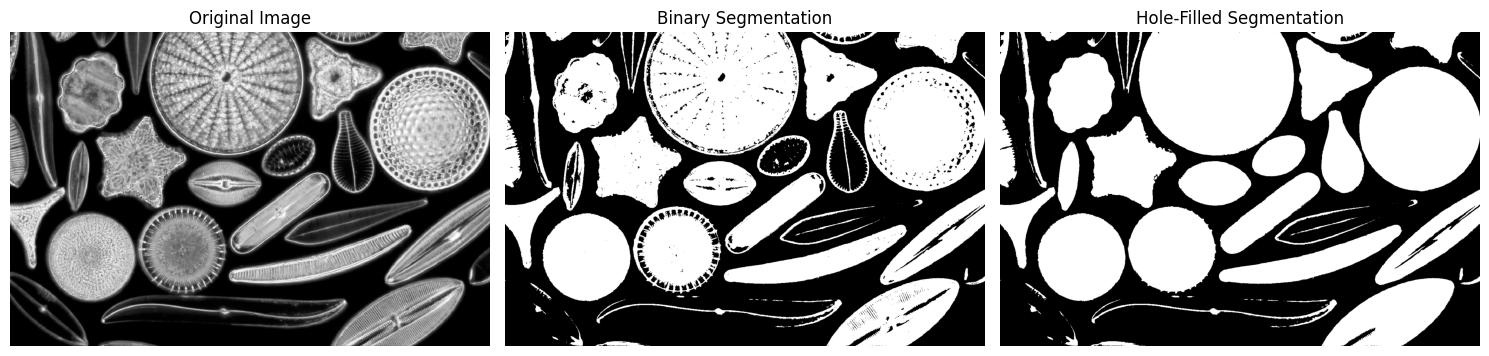

In [3]:
from scipy.ndimage import binary_fill_holes
from skimage import filters, color
import matplotlib.pyplot as plt

# Convert to grayscale
diatom_image_gray = color.rgb2gray(diatom_image)

# Apply Otsu's threshold
threshold_value = filters.threshold_otsu(diatom_image_gray)

# Create a binary image
binary_diatoms = diatom_image_gray > threshold_value

# Fill holes in the binary image
filled_diatoms = binary_fill_holes(binary_diatoms)

# Display the original, binary, and hole-filled images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(diatom_image_gray, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Binary segmented image
plt.subplot(1, 3, 2)
plt.imshow(binary_diatoms, cmap="gray")
plt.title("Binary Segmentation")
plt.axis("off")

# Hole-filled image
plt.subplot(1, 3, 3)
plt.imshow(filled_diatoms, cmap="gray")
plt.title("Hole-Filled Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

## 🌄 Step 4: Generating an Elevation Map

To refine segmentation, generate an elevation map of the image using edge detection.


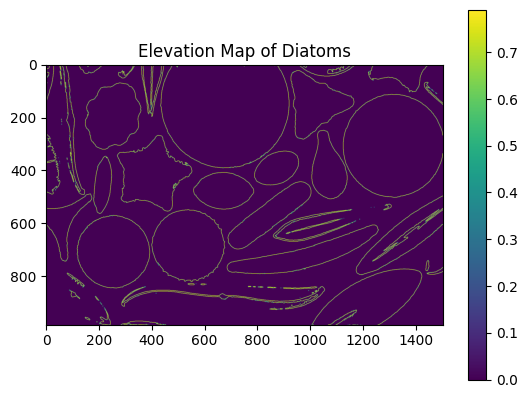

In [4]:
from skimage.filters import sobel

# Generate the elevation map
elevation_map = sobel(filled_diatoms)

# Plot the elevation map
plt.imshow(elevation_map, cmap="viridis")
plt.title("Elevation Map of Diatoms")
plt.colorbar()
plt.show()

### Application:

Elevation maps simulate a 3D terrain, where diatoms appear as "hills" and background regions as "valleys." This is ideal for watershed segmentation.


## 🗺️ Step 5: Watershed Segmentation

Use the watershed algorithm to separate overlapping diatoms.


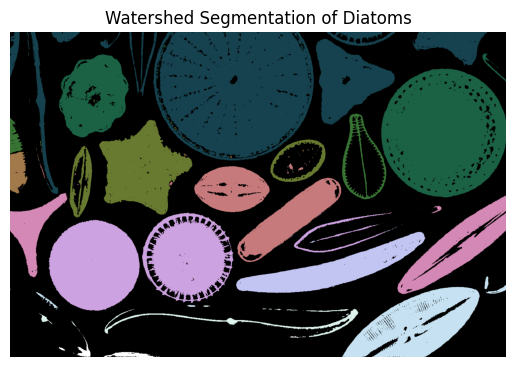

In [6]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import numpy as np
from scipy import ndimage as ndi

from color_map import discrete_cmap

colormap = discrete_cmap(15, "cubehelix")

# Compute markers for watershed
markers = ndi.label(binary_diatoms)[0]

# Apply watershed segmentation
segmentation = watershed(-elevation_map, markers, mask=binary_diatoms)

segmentation[segmentation == 0] = -100

# Visualize the segmented diatoms
plt.imshow(segmentation, cmap=colormap)
plt.title("Watershed Segmentation of Diatoms")
plt.axis("off")
plt.show()

## 🔍 Step 6: Labeling Diatoms

Identify each segmented diatom for further analysis.


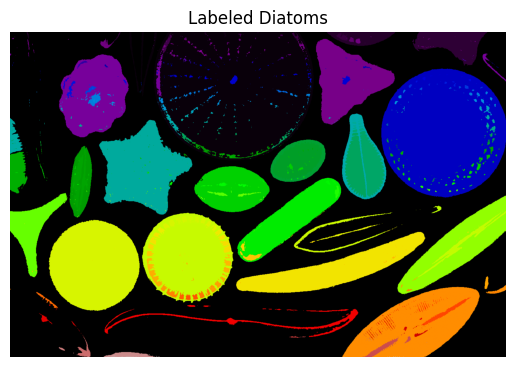

Number of Diatoms Detected: 1576


In [7]:
from skimage.measure import regionprops, label

# Label connected regions
labeled_diatoms = label(segmentation)

# Visualize labeled regions
plt.imshow(labeled_diatoms, cmap="nipy_spectral")
plt.title("Labeled Diatoms")
plt.axis("off")
plt.show()

# Count labeled regions
print(f"Number of Diatoms Detected: {labeled_diatoms.max()}")

## 📊 Step 7: Feature Extraction

Measure geometric properties (e.g., area, perimeter, circularity) for each diatom.


In [8]:
# Extract properties of each labeled diatom
properties = regionprops(labeled_diatoms, intensity_image=diatom_image)

for i, prop in enumerate(properties[:5], start=1):
    print(f"Diatom {i}:")
    print(f"  Area: {prop.area}")
    print(f"  Perimeter: {prop.perimeter}")
    print(f"  Centroid: {prop.centroid}")
    print(f"  Mean Intensity: {prop.mean_intensity}")

Diatom 1:
  Area: 368.0
  Perimeter: 135.90559159102153
  Centroid: (np.float64(21.785326086956523), np.float64(4.470108695652174))
  Mean Intensity: [44.32608696 72.85054348 50.95652174]
Diatom 2:
  Area: 6.0
  Perimeter: 6.0
  Centroid: (np.float64(0.5), np.float64(4.0))
  Mean Intensity: [ 93.         121.83333333  79.83333333]
Diatom 3:
  Area: 2265.0
  Perimeter: 400.1076477383248
  Centroid: (np.float64(55.98631346578367), np.float64(12.450331125827814))
  Mean Intensity: [143.63487859 163.71258278 104.91611479]
Diatom 4:
  Area: 670387.0
  Perimeter: 29086.423361185523
  Centroid: (np.float64(568.1237911833016), np.float64(703.3289189677007))
  Mean Intensity: [ 4.2223283  20.22388113 26.06866332]
Diatom 5:
  Area: 7042.0
  Perimeter: 1272.517856687341
  Centroid: (np.float64(235.52002272081796), np.float64(95.96677080374893))
  Mean Intensity: [ 25.78940642 192.40201647 177.29778472]


## 🎨 Step 8: Visualizing Diatom Boundaries

Overlay boundaries on the original image to verify segmentation accuracy.


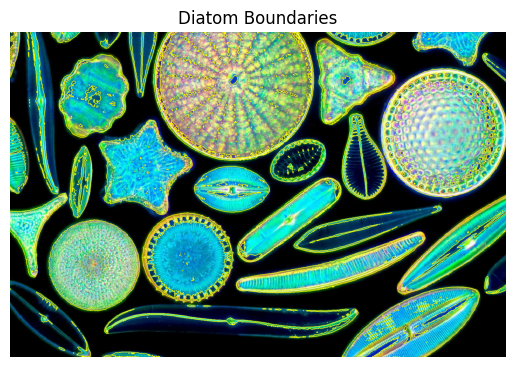

In [9]:
from skimage.segmentation import mark_boundaries

# Highlight diatom boundaries
boundaries = mark_boundaries(diatom_image, labeled_diatoms)

# Display the boundaries
plt.imshow(boundaries)
plt.title("Diatom Boundaries")
plt.axis("off")
plt.show()

<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Segment Anything Demo</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #f4f4f4;
        }
        iframe {
            border: none;
            width: 100%;
            height: 800px;
        }
    </style>
</head>
<body>
    <iframe src="https://segment-anything.com/demo#" title="Segment Anything Demo"></iframe>
</body>
</html>